<a href="https://colab.research.google.com/github/lintangiqhtiar/Data-Analitycs/blob/main/Sales_Data_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

#import google spereadsheet

In [3]:
!pip install --upgrade gspread
!pip install --upgrade oauth2client
!pip install pandas

import gspread
from google.auth.transport.requests import Request
from google.colab import auth
from google.auth import default
import pandas as pd

# Otorisasi
auth.authenticate_user()
creds, _ = default()
creds.refresh(Request())
gc = gspread.authorize(creds)

# URL dari Google Spreadsheet Anda
sheet_url = 'https://docs.google.com/spreadsheets/d/1YjaalV1FmbjbCQGGtlFizW_M7Qi5ugKbISOF--so93A/edit?gid=1666191194' #kasih akses public dan editor (harus dicoba untuk diprivate)
sheet_url_trf = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

# Membaca data dari URL CSV
df = pd.read_csv(sheet_url_trf)
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
https://docs.google.com/spreadsheets/d/1YjaalV1FmbjbCQGGtlFizW_M7Qi5ugKbISOF--so93A/export?format=csv&gid=1666191194


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


#cleaning data

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


In [6]:
#membuat data frame baru untuk dibersihkan
df_cleaned = df.copy()

#merubah tipe date time nya
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])
df_cleaned.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [7]:
df_cleaned['DEALSIZE'].value_counts()

for col_name in ['STATUS', 'PRODUCTLINE', 'DEALSIZE', 'CITY']:
  print(df_cleaned[col_name].value_counts(), '\n')

STATUS
Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64 

PRODUCTLINE
Classic Cars        967
Vintage Cars        608
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64 

DEALSIZE
Medium    1384
Small     1283
Large      157
Name: count, dtype: int64 

CITY
Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Los Angeles        14
Munich             14
Burbank            13
Charleroi           8
Name: count, Length: 73, dtype: int64 



In [8]:
df_cleaned['REVENUE'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']
df_cleaned.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


#EDA

highest and lowest of Product Line

In [9]:
y=df_cleaned.groupby(['PRODUCTLINE']).size().reset_index(name='counts') #menghitung jumlah rating yang tersedia
print(y)

        PRODUCTLINE  counts
0      Classic Cars     967
1       Motorcycles     331
2            Planes     306
3             Ships     234
4            Trains      77
5  Trucks and Buses     301
6      Vintage Cars     608


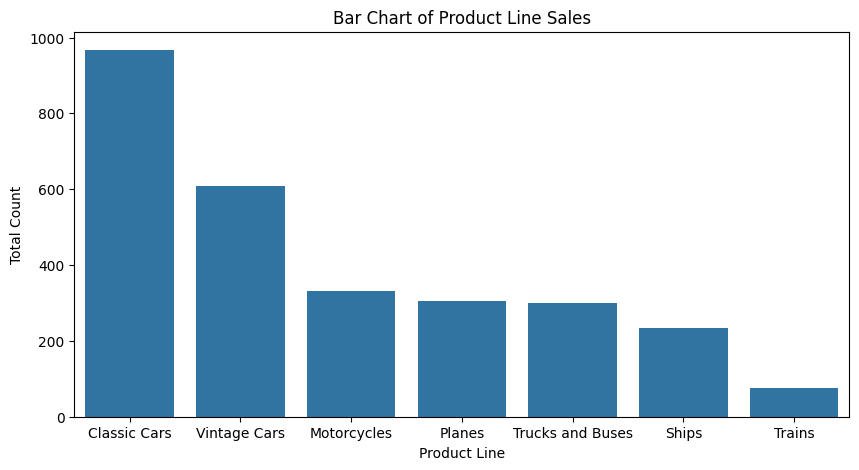

In [10]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot( x='PRODUCTLINE', y='counts', data = y.sort_values('counts', ascending=False))

#labeling
plt.xlabel('Product Line')
plt.ylabel('Total Count')
plt.title('Bar Chart of Product Line Sales')
plt.show()

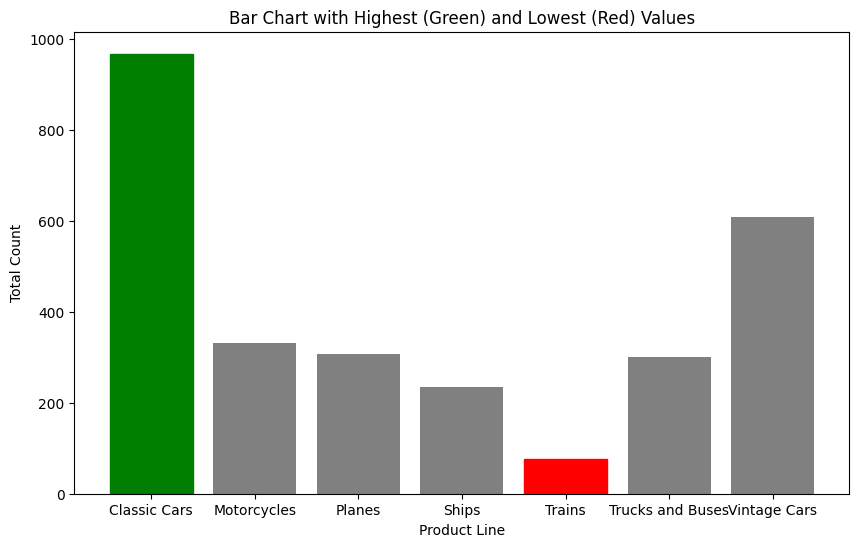

In [11]:
# Identify the highest and lowest values
highest = y.loc[y['counts'].idxmax()]
lowest = y.loc[y['counts'].idxmin()]

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Plot all bars
bars = plt.bar(y['PRODUCTLINE'], y['counts'], color='gray')

# Highlight the highest and lowest bars
bars[y['counts'].idxmax()].set_color('green')
bars[y['counts'].idxmin()].set_color('red')

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Total Count')
plt.title('Bar Chart with Highest (Green) and Lowest (Red) Values')
plt.show()

**Insight**: The product line with the highest sales is Classic Cars, while the product line with the lowest sales is Trains.

##Sales Performance Over Time

In [12]:
data_sales=df_cleaned.groupby(['ORDERDATE','REVENUE']).size().reset_index(name='counts')
data_sales.head()

,ORDERDATE,REVENUE,counts
0,2003-01-06,1689.03,1
1,2003-01-06,1903.22,1
2,2003-01-06,3000.00,1
3,2003-01-06,3390.00,1
4,2003-01-09,1404.00,1


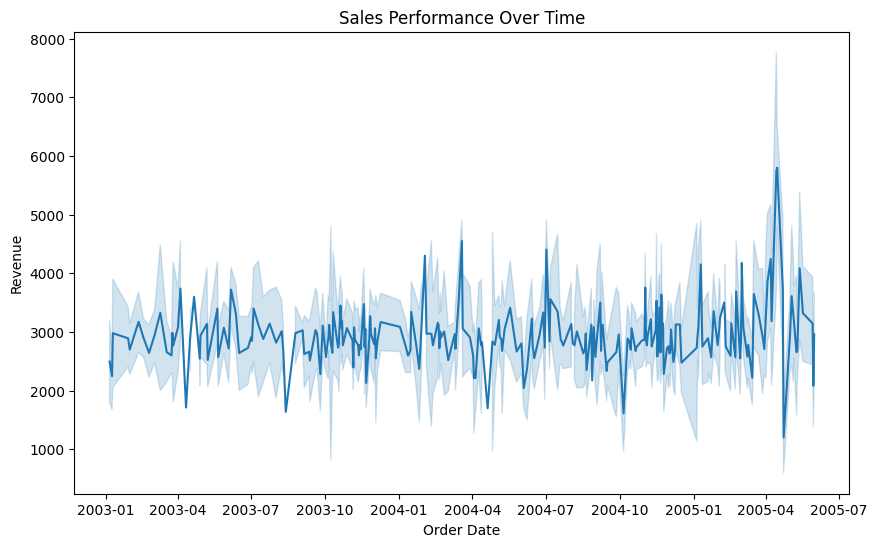

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ORDERDATE', y='REVENUE', data=data_sales)

#add label and title
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.title('Sales Performance Over Time')
plt.show()

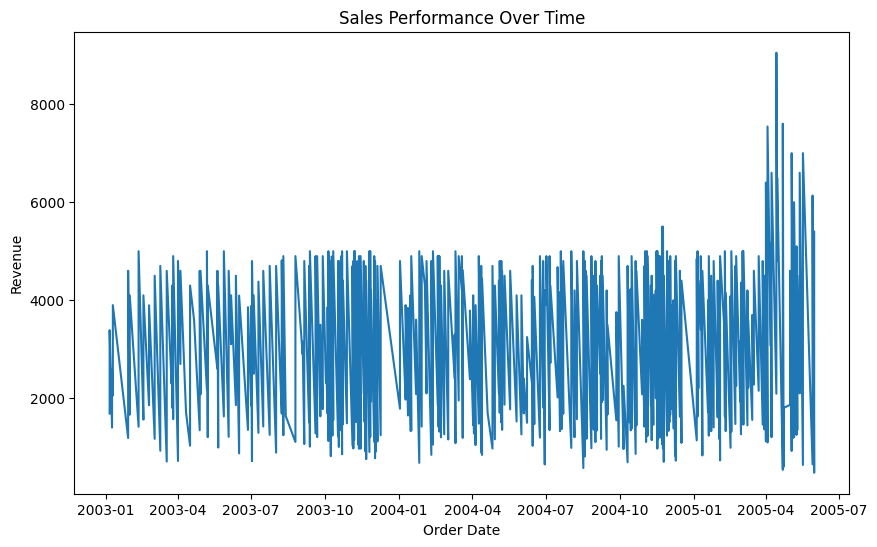

In [14]:
plt.figure(figsize=(10, 6))
plt.plot('ORDERDATE','REVENUE', data=data_sales)

#add label and title
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.title('Sales Performance Over Time')
plt.show()

In [15]:
# Set kolom 'date' sebagai index
data_sales.set_index('ORDERDATE', inplace=True)

# Menghitung total revenue per bulan
monthly_revenue = data_sales['REVENUE'].resample('M').sum().reset_index(name='TotalRevenue')

# Menampilkan total revenue per bulan
print(monthly_revenue)

    ORDERDATE  TotalRevenue
0  2003-01-31      97585.96
1  2003-02-28     117836.80
2  2003-03-31     137796.23
3  2003-04-30     162421.03
4  2003-05-31     159854.12
5  2003-06-30     121752.84
6  2003-07-31     143069.73
7  2003-08-31     159426.32
8  2003-09-30     200945.86
9  2003-10-31     463940.57
10 2003-11-30     770403.27
11 2003-12-31     199217.21
12 2004-01-31     250915.87
13 2004-02-29     239989.05
14 2004-03-31     156158.56
15 2004-04-30     165135.80
16 2004-05-31     213215.14
17 2004-06-30     234590.75
18 2004-07-31     258003.61
19 2004-08-31     364806.59
20 2004-09-30     242254.26
21 2004-10-31     414996.13
22 2004-11-30     838979.18
23 2004-12-31     281555.93
24 2005-01-31     275980.46
25 2005-02-28     272802.30
26 2005-03-31     305731.94
27 2005-04-30     211377.63
28 2005-05-31     358143.65


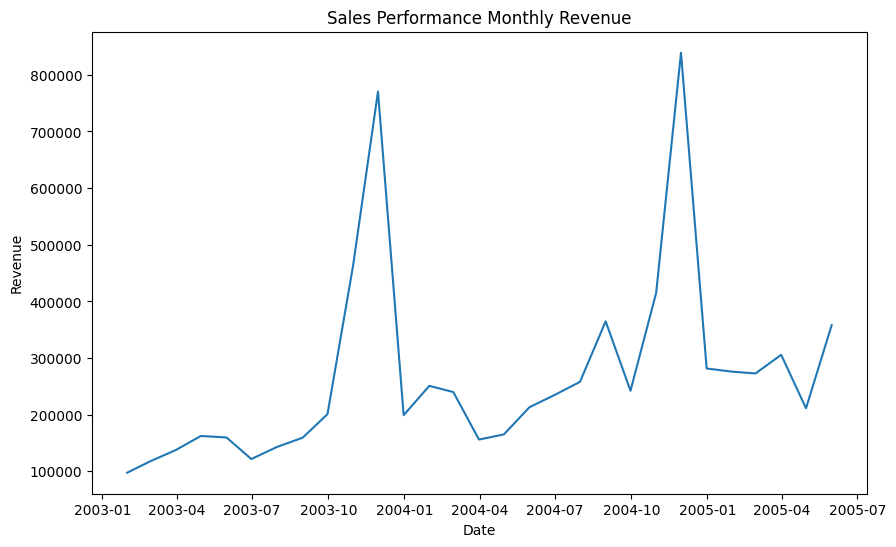

In [16]:
#membuat line chart
plt.figure(figsize=(10,6))
plt.plot('ORDERDATE','TotalRevenue',data=monthly_revenue)

#add title and label
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Sales Performance Monthly Revenue')
plt.show()

##Corelate Deal Size with Total Sales

In [17]:
data_corelate=df_cleaned.groupby(['DEALSIZE','REVENUE']).size().reset_index(name='counts')
data_corelate.head()

,DEALSIZE,REVENUE,counts
0,Large,2900.0,2
1,Large,3100.0,1
2,Large,3200.0,2
3,Large,3300.0,3
4,Large,3400.0,2


In [31]:
total_revenue_per_jenis = data_corelate.groupby('DEALSIZE')['REVENUE'].sum().reset_index(name='TotalRevenue')
print(total_revenue_per_jenis)


  DEALSIZE  TotalRevenue
0    Large     185657.91
1   Medium    1581241.28
2    Small    2185711.46


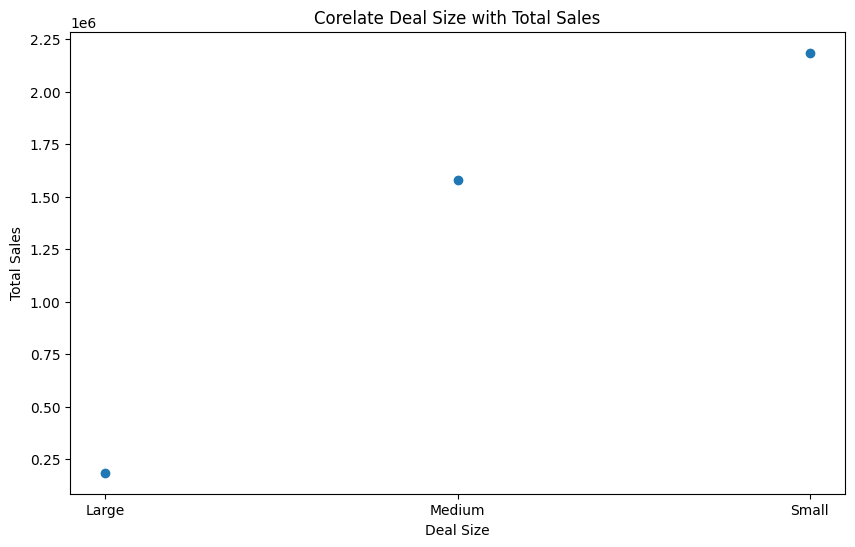

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(total_revenue_per_jenis['DEALSIZE'], total_revenue_per_jenis['TotalRevenue'])

#add title and label
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.title('Corelate Deal Size with Total Sales')
plt.show()


**Insight**: The correlation between deal size and total sales is positive.

##Persentage of contribution for each type deal

In [34]:
total_revenue_per_jenis.head()

,DEALSIZE,TotalRevenue
0,Large,185657.91
1,Medium,1581241.28
2,Small,2185711.46


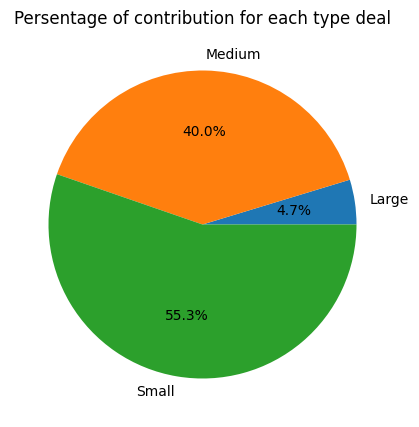

In [35]:
plt.pie(total_revenue_per_jenis['TotalRevenue'], labels=total_revenue_per_jenis['DEALSIZE'], autopct='%1.1f%%')
plt.title('Persentage of contribution for each type deal')
plt.show()

#Saving Cleaned Data to CSV

In [36]:
from google.colab import files

# Saving the cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_sales_data.csv', index=False)

# Download the file
files.download('cleaned_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>